In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [5]:
# dummy dataset
X, y = make_regression(n_samples = 4, n_features = 1, n_informative =1, n_targets=1, noise=80, random_state=13)

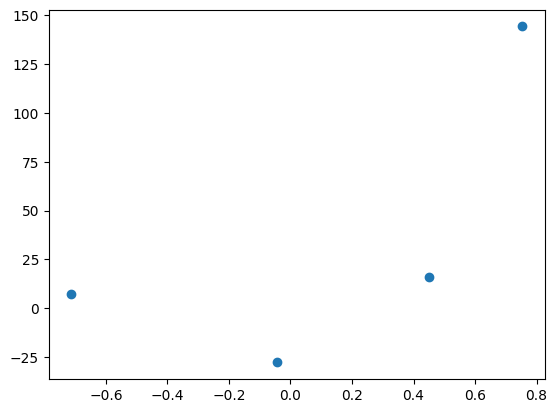

In [6]:
plt.scatter(X,y)

# USING OLS


to find the value of the intercept

In [7]:
reg = LinearRegression()

reg.fit(X, y)

# for y = mx + b
print(reg.coef_) # m : [78.35063668]
print(reg.intercept_) # b : 26.15963284313262 - goal in this code

[78.35063668]
26.15963284313262


In [8]:
reg_pred = reg.predict(X)

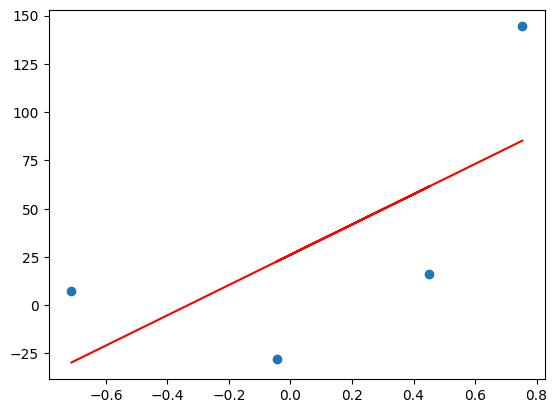

In [9]:
plt.scatter(X, y)
plt.plot(X, reg_pred, color='red')

# Applying Gradient Descent
assuming the slope as 78.35 

and taking initial value of b = 0

In [10]:
# y = mx + b
y_pred_0 =  (78.35*X + 0).reshape(4)

In [11]:
print(y_pred_0)

[-55.81580837  35.39949674  -3.48681619  59.05759577]


# Plotting predicted value at different values of intercept

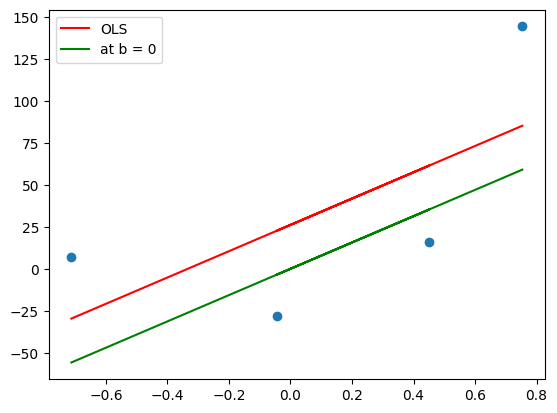

In [12]:
plt.scatter(X, y)

plt.plot(X, reg_pred, color = 'red', label='OLS')
plt.plot(X, y_pred_0, color = 'green', label='at b = 0')
plt.legend()

# calculating slope


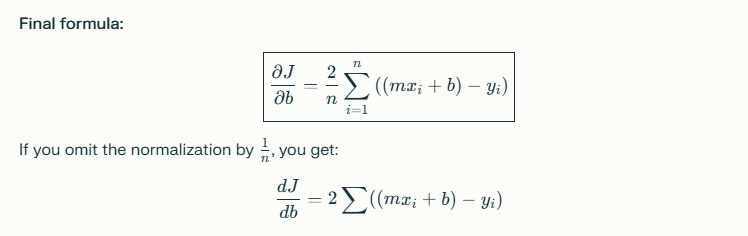

In [13]:
# d l/db = 2
m = 78.35
b = 0
loss_slope = 2* np.sum((m*X.ravel() + b) - y)

In [14]:
print(loss_slope)

-209.27763408209216


In [15]:
# assuming 
lr = 0.1

step_size = lr*loss_slope 
b = b - step_size

print(b)

20.927763408209216


In [17]:

y_pred_20 = m*X + b

In [18]:
y_pred_20 = y_pred_20.reshape(4)
print(y_pred_20)

[-34.88804496  56.32726015  17.44094722  79.98535918]


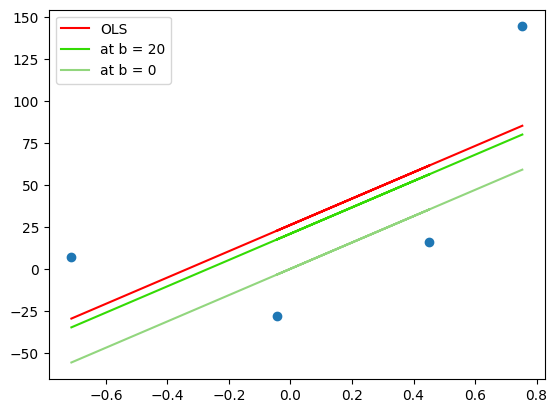

In [19]:
plt.scatter(X, y)

plt.plot(X, reg_pred, color = 'red', label = 'OLS')
plt.plot(X, y_pred_20, color = '#34db04', label='at b = 20')
plt.plot(X, y_pred_0, color = '#92d67e', label='at b = 0')
plt.legend()

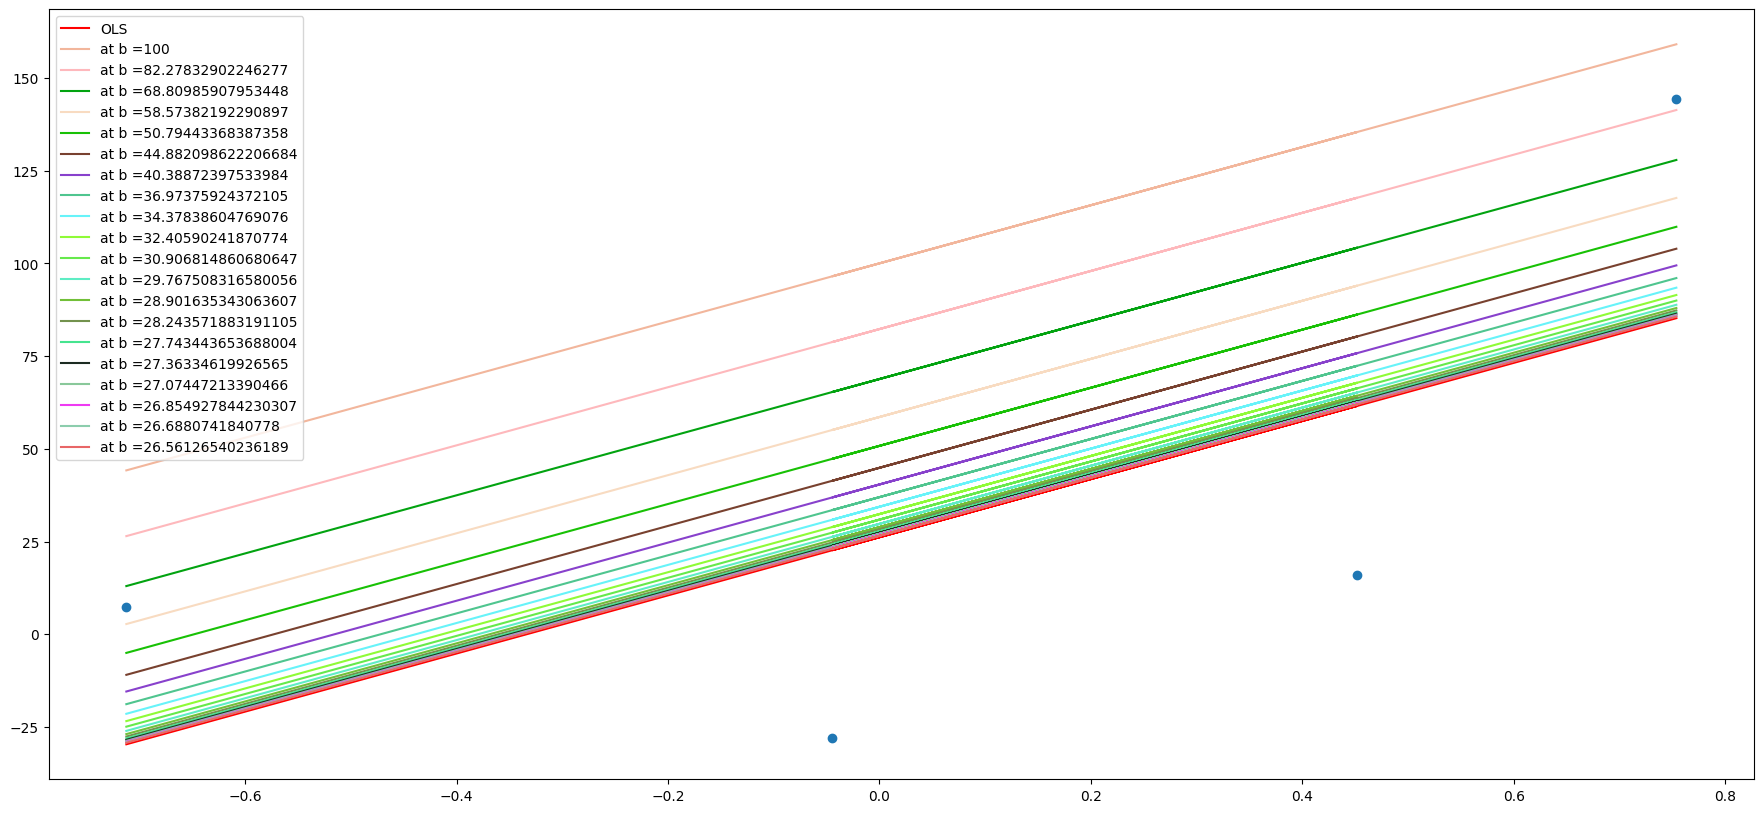

In [26]:
# Iteration - 2
# play along with different values of b, lr, and epoch(i)
m = 78.35
b = 100
lr = 0.03
plt.figure(figsize=(22, 10))
plt.scatter(X, y)

plt.plot(X, reg_pred, color = 'red', label = 'OLS')


for i in range(20):

    loss_slope = 2* np.sum((m*X.ravel() + b) - y)



    step_size = lr*loss_slope 
    
    y_pred = m*X + b

    plt.plot(X, y_pred, color = "#" + ''.join([random.choice('0123456789ABCDEF') for _ in range(6)]), label='at b =' + str(b))
    b = b - step_size
   
plt.legend()

# Observation

> * we can update reach to the desired intercept with changing the **learning_rate** and **epochs** ( no of iterations)
> * learning rate should be decided properly, a lower learning rate eg: 0.0001 will never let us reach the target value, and a higher learning rate eg 0.5 will make big jumps and will take us far from the target. 
